<a href="https://colab.research.google.com/github/ARCHITHAOJHA/Explainable-AI-Lab-Practical-2170/blob/main/2303A52170_01_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ARCHITHA OJHA

2303A52170


QUESTION 1

The marketing department of a car dealership company wants to build a model to
predict the number of cars sold based on the number of TV advertisements aired.

Model: Cars_Sold = 10.00 + 5.00 * TV_Ads
Prediction for 10 TV Ads: 60.00 cars sold


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


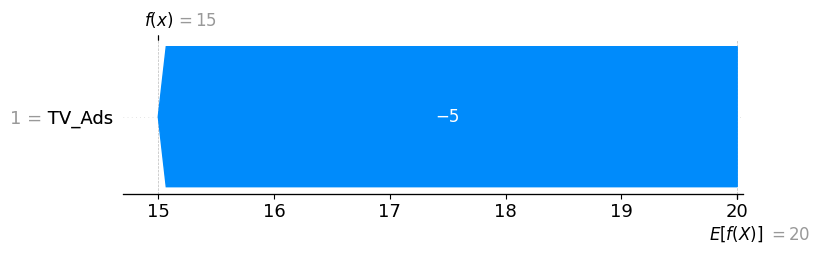

In [1]:
# Import libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
import shap
import matplotlib.pyplot as plt

# Load data
car_sales_df = pd.read_excel("/content/Car_Sales.xlsx")
car_sales_df.columns = ['TV_Ads', 'Cars_Sold']

# Prepare data
X = car_sales_df[['TV_Ads']]
y = car_sales_df['Cars_Sold']

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Show model equation
intercept = model.intercept_
slope = model.coef_[0]
print(f"Model: Cars_Sold = {intercept:.2f} + {slope:.2f} * TV_Ads")

# Predict for 10 TV Ads
prediction_10_ads = model.predict([[10]])
print(f"Prediction for 10 TV Ads: {prediction_10_ads[0]:.2f} cars sold")

# Compute SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# Waterfall plot for 1st instance
shap.plots.waterfall(shap_values[0])

# Force plot for all predictions (open in Jupyter Notebook or save as HTML)
shap.plots.force(shap_values)

# Optional: Save force plot as HTML
shap.initjs()
shap_html = shap.plots.force(shap_values[0], matplotlib=False)
with open("shap_force_plot.html", "w") as f:
    f.write(shap_html.html())

QUESTION 2

Predicting Student Test Scores Based on IQ and Study Hours

Model Equation: Test_Score = 20.00 + 0.50*IQ + 0.50*Study_Hours
Prediction for IQ=95 and Study Hours=25: 80.00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


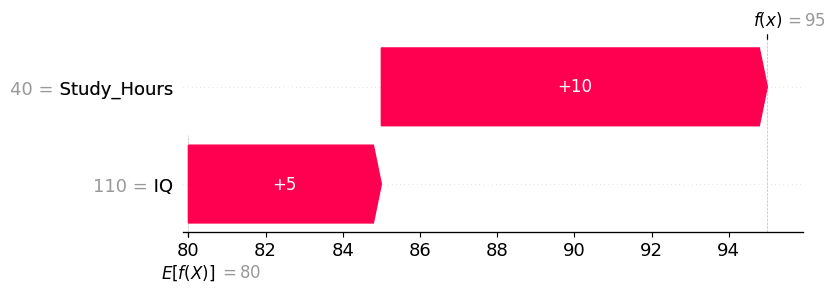

In [2]:
# Import required libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
import shap
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel("/content/StudyHour.xlsx")
df.columns = ['IQ', 'Study_Hours', 'Test_Score']

# Define independent and dependent variables
X = df[['IQ', 'Study_Hours']]
y = df['Test_Score']

# Fit Multiple Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Get model coefficients
intercept = model.intercept_
coef_iq = model.coef_[0]
coef_study = model.coef_[1]

print(f"Model Equation: Test_Score = {intercept:.2f} + {coef_iq:.2f}*IQ + {coef_study:.2f}*Study_Hours")

# Predict for IQ=95 and Study Hours=25
prediction = model.predict([[95, 25]])
print(f"Prediction for IQ=95 and Study Hours=25: {prediction[0]:.2f}")

# Compute SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# Plot SHAP waterfall for first student
shap.plots.waterfall(shap_values[0])

# Plot SHAP force plot for all predictions (use in Jupyter or export)
shap.plots.force(shap_values)

# Optionally save force plot for one student
shap.initjs()
force_html = shap.plots.force(shap_values[0], matplotlib=False)
with open("study_shap_force.html", "w") as f:
    f.write(force_html.html())

QUESTION 3

Predicting Employee Salary Based on Years of Experience

📌 Linear Regression Equation:
Salary = 8226.12 * YearsExperience + 42919.01

▶ Slope: For each additional year of experience, salary increases by approximately $8226.12
▶ Intercept: Estimated base salary (0 years experience): $42919.01

🎯 Predicted Salary for 3.5 years: $71710.43
🎯 Predicted Salary for 7.0 years: $100501.85

🔍 SHAP Values for Each Record:
    YearsExperience     Salary      Predicted    SHAP Value
0              4.37   73575.03   78867.155819  -4754.697514
1              9.56  127918.49  121560.720002  37938.866668
2              7.59  105306.81  105355.263077  21733.409744
3              6.39   96051.53   95483.918757  11862.065424
4              2.40   58591.47   62661.698895 -20960.154439
5              2.40   70861.39   62661.698895 -20960.154439
6              1.52   53612.51   55422.713060 -28199.140273
7              8.80  113911.45  115308.868599  31687.015266
8              6.41  101802.72   95648.441163  12026.587829
9              7.37  100225.78  103545.516

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


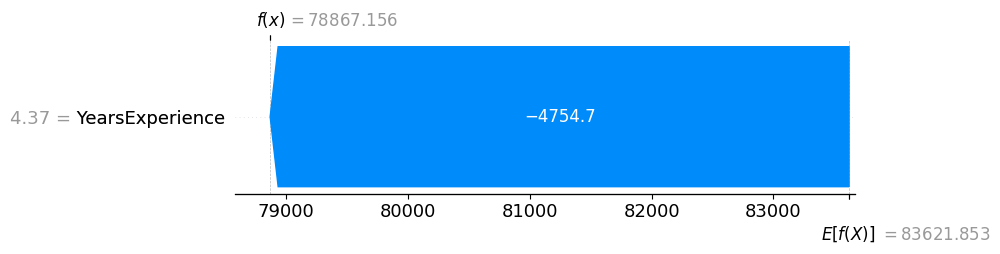


📊 SHAP Force Plot for First Prediction:

📊 SHAP Force Plot for All Employees:

🔹 SHAP Analysis - Low Experience (<4 years):
    YearsExperience  SHAP Rounded
4              2.40     -20960.15
5              2.40     -20960.15
6              1.52     -28199.14
10             1.19     -30913.76
13             2.91     -16764.83
14             2.64     -18985.89
15             2.65     -18903.62
16             3.74      -9937.15
19             3.62     -10924.29
21             2.26     -22111.81
22             3.63     -10842.03
26             2.80     -17669.71
29             1.42     -29021.75

🔹 SHAP Analysis - High Experience (>7 years):
    YearsExperience  SHAP Rounded
1              9.56      37938.87
2              7.59      21733.41
7              8.80      31687.02
9              7.37      19923.66
11             9.73      39337.31
12             8.49      29136.92
25             8.07      25681.95


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import shap

# Initialize SHAP
shap.initjs()
# 1. Generate or load dataset

# Simulated dataset with 30 entries
np.random.seed(42)
years_exp = np.round(np.random.uniform(1, 10, 30), 2)
# Salary = 40000 + 9000 * experience + noise
salary = 40000 + (years_exp * 9000) + np.random.normal(0, 5000, 30)

df = pd.DataFrame({
    'YearsExperience': years_exp,
    'Salary': np.round(salary, 2)
})

X = df[['YearsExperience']]
y = df['Salary']

# 2. Fit Simple Linear Regression

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

print("📌 Linear Regression Equation:")
print(f"Salary = {slope:.2f} * YearsExperience + {intercept:.2f}")

# 3. Coefficient Interpretation

print(f"\n▶ Slope: For each additional year of experience, salary increases by approximately ${slope:.2f}")
print(f"▶ Intercept: Estimated base salary (0 years experience): ${intercept:.2f}")

# 4. Predictions

test1 = np.array([[3.5]])
test2 = np.array([[7]])

pred_35 = model.predict(test1)[0]
pred_7 = model.predict(test2)[0]

print(f"\n🎯 Predicted Salary for 3.5 years: ${pred_35:.2f}")
print(f"🎯 Predicted Salary for 7.0 years: ${pred_7:.2f}")

# 5. SHAP Explanations

explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# Add SHAP values and predictions to the DataFrame
df['Predicted'] = model.predict(X)
df['Base Value'] = explainer.expected_value
df['SHAP Value'] = df['Predicted'] - explainer.expected_value

print("\n🔍 SHAP Values for Each Record:")
print(df[['YearsExperience', 'Salary', 'Predicted', 'SHAP Value']])

# 6. SHAP Plots


# ➤ SHAP Waterfall Plot for the 1st instance
print("\n📊 SHAP Waterfall Plot for the First Employee:")
shap.plots.waterfall(shap_values[0], max_display=5)

# ➤ SHAP Force Plot for the 1st prediction
print("\n📊 SHAP Force Plot for First Prediction:")
shap.plots.force(shap_values[0])

# ➤ SHAP Force Plot for All Predictions
print("\n📊 SHAP Force Plot for All Employees:")
shap.plots.force(shap_values)

# 7. SHAP Value Interpretation

df['SHAP Rounded'] = df['SHAP Value'].round(2)

low_exp = df[df['YearsExperience'] < 4]
high_exp = df[df['YearsExperience'] > 7]

print("\n🔹 SHAP Analysis - Low Experience (<4 years):")
print(low_exp[['YearsExperience', 'SHAP Rounded']])

print("\n🔹 SHAP Analysis - High Experience (>7 years):")
print(high_exp[['YearsExperience', 'SHAP Rounded']])

QUESTION 4


Predicting Sales Performance Using Intelligence and Extroversion Scores

     Int   Ext     sal  int-intbar  Unnamed: 4  Unnamed: 5  Unnamed: 6  \
0   89.0  21.0  2625.0      -16.25      -355.0     5768.75    264.0625   
1   93.0  24.0  2700.0      -12.25      -280.0     3430.00    150.0625   
2   91.0  21.0  3100.0      -14.25       120.0    -1710.00    203.0625   
3  122.0  23.0  3150.0       16.75       170.0     2847.50    280.5625   
4  115.0  27.0  3175.0        9.75       195.0     1901.25     95.0625   

   Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  Unnamed: 18  \
0         NaN         NaN         NaN  ...          NaN   
1         NaN         NaN         NaN  ...          NaN   
2         NaN         NaN         NaN  ...          NaN   
3         NaN         NaN         NaN  ...          NaN   
4         NaN         NaN         NaN  ...          NaN   

          SUMMARY OUTPUT  Unnamed: 20  Unnamed: 21  Unnamed: 22  Unnamed: 23  \
0                    NaN          NaN          NaN          NaN          NaN   
1  Regression Statistics          NaN   

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


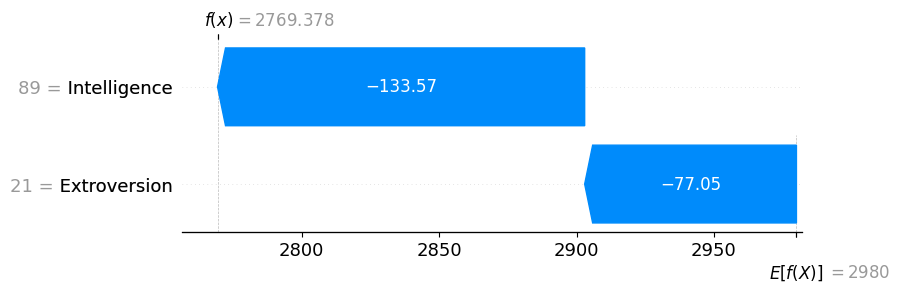


SHAP Force Plot (1st Record):



SHAP Summary Plot (All Records):


/tmp/ipython-input-126120896.py:73: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X)


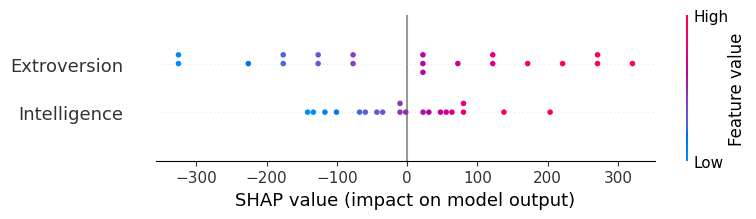

In [14]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Fix deprecated np.bool issue (optional, depends on numpy version)
np.bool = np.bool_

# Load Excel file
df = pd.read_excel("/content/Int_Ext.xlsx")

# Display first few rows (optional)
print(df.head())

# Select relevant rows and columns
df = df.iloc[0:20] # Select rows with data
df = df[['Int', 'Ext', 'sal']] # Select relevant columns
df.columns = ['Intelligence', 'Extroversion', 'Sales'] # Rename columns

# Display first few rows of cleaned data (optional)
print("\nCleaned Data Head:")
print(df.head())


# Features and target
X = df[['Intelligence', 'Extroversion']]
y = df['Sales']

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Print model coefficients
intercept = model.intercept_
coef = model.coef_
print(f"\nLinear Model Equation:")
print(f"Sales = {intercept:.2f} + {coef[0]:.2f}*Intelligence + {coef[1]:.2f}*Extroversion")

# Coefficient Interpretation
print(f"\nInterpretation:")
print(f"Intercept: ${intercept:.2f} (Sales when Intelligence and Extroversion are 0 — theoretical baseline)")
print(f"Intelligence Coefficient: Each 1-point increase in Intelligence increases sales by ${coef[0]:.2f}")
print(f"Extroversion Coefficient: Each 1-point increase in Extroversion increases sales by ${coef[1]:.2f}")

# Predictions
test_1 = [[100, 25]]
test_2 = [[120, 18]]
pred_1 = model.predict(test_1)[0]
pred_2 = model.predict(test_2)[0]

print(f"\nPredicted Sales for Intelligence=100 & Extroversion=25: ${pred_1:.2f}")
print(f"Predicted Sales for Intelligence=120 & Extroversion=18: ${pred_2:.2f}")

# SHAP explanation using LinearExplainer for linear models
explainer = shap.LinearExplainer(model, X, feature_perturbation="interventional")
shap_values = explainer.shap_values(X)

# Waterfall plot for first prediction
print("\nSHAP Waterfall Plot (1st Record):")
shap.plots.waterfall(shap.Explanation(values=shap_values[0],
                                      base_values=explainer.expected_value,
                                      data=X.iloc[0],
                                      feature_names=X.columns))

# Force plot for first prediction
print("\nSHAP Force Plot (1st Record):")
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X.iloc[0])

# Summary plot for all predictions
print("\nSHAP Summary Plot (All Records):")
shap.summary_plot(shap_values, X)

QUESTION 5

A company is analyzing the effect of its advertising expenditure on product sales. The
dataset below provides information about the amount spent on Facebook and Newspaper
advertisements (in thousands of dollars), and the resulting sales (in thousands of units):

   youtube  facebook  newspaper  sales
0   276.12     45.36      83.04  26.52
1    53.40     47.16      54.12  12.48
2    20.64     55.08      83.16  11.16
3   181.80     49.56      70.20  22.20
4   216.96     12.96      70.08  15.48

Model Equation:
Sales = 11.00 + 0.20*Facebook + 0.01*Newspaper

Intercept: 11.00 → Predicted sales when no ad money is spent.
Facebook Coefficient: 0.20 → Additional sales per $1000 spent on Facebook.
Newspaper Coefficient: 0.01 → Additional sales per $1000 spent on Newspaper.

Predicted Sales for Facebook=50 & Newspaper=70: 21.44k units
Predicted Sales for Facebook=25 & Newspaper=30: 16.18k units

SHAP Waterfall Plot for 1st Data Point:


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


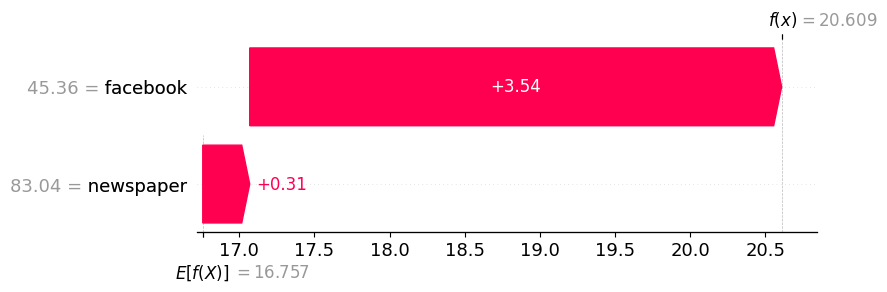


SHAP Force Plot for 1st Data Point:



SHAP Summary Plot:


/tmp/ipython-input-4029381357.py:56: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X)


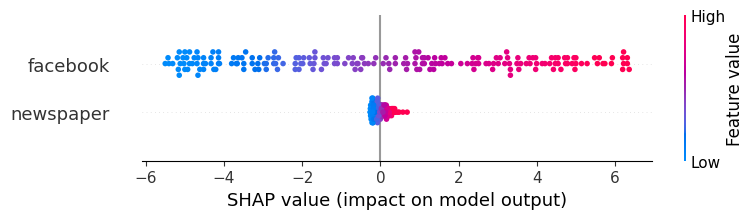

In [15]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Fix for deprecated numpy.bool
np.bool = np.bool_

# Load your dataset
df = pd.read_excel("/content/Marketing_Dataset.xlsx")

# Display first few rows (optional)
print(df.head())

# Features and target
X = df[['facebook', 'newspaper']]
y = df['sales']

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Model coefficients
intercept = model.intercept_
coef = model.coef_
print(f"\nModel Equation:")
print(f"Sales = {intercept:.2f} + {coef[0]:.2f}*Facebook + {coef[1]:.2f}*Newspaper")

# Interpretation
print(f"\nIntercept: {intercept:.2f} → Predicted sales when no ad money is spent.")
print(f"Facebook Coefficient: {coef[0]:.2f} → Additional sales per $1000 spent on Facebook.")
print(f"Newspaper Coefficient: {coef[1]:.2f} → Additional sales per $1000 spent on Newspaper.")

# Predictions
pred_1 = model.predict([[50, 70]])[0]
pred_2 = model.predict([[25, 30]])[0]
print(f"\nPredicted Sales for Facebook=50 & Newspaper=70: {pred_1:.2f}k units")
print(f"Predicted Sales for Facebook=25 & Newspaper=30: {pred_2:.2f}k units")

# SHAP Analysis
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# SHAP Waterfall plot for first instance
print("\nSHAP Waterfall Plot for 1st Data Point:")
shap.plots.waterfall(shap_values[0])

# SHAP Force plot
print("\nSHAP Force Plot for 1st Data Point:")
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0].values, X.iloc[0])

# SHAP Summary plot (optional)
print("\nSHAP Summary Plot:")
shap.summary_plot(shap_values, X)